# One pager analysis of the World Development Indicators (WDI)
## Yaqian (Gloria) Zhang

##  Summary:

### The pager includes four parts, Pull Data, Data Wrangling, Visualization, and Appendix. 

### The original data was got from the World Bank API using Python. Data wrangling tasks conducted includes data exploration, data clean (delete nan value), transformation (change data type, bin data, generate new columns, group data, re-index), and three datasets (df, df2, df3) have been generated after that for further use. 

### Visualization part includes one chart highlighting the main result of my analysis. The chart in visualization part is generate to provide time serials analysis for Life Expectancy at Birth (LE). And main findings are listed as follows. 1) average of Life Expectancy at Birth keep increasing over time (1960 - 2017), and the growth rate after Year 1986 is slight small than that before 1986. 2) Most LE data falls between 42 and 78. High LE data (LE > 78) began to appear after 1986, and low LE data (LE < 42) disappear after 2002. 3）Although for most countries, LE increased over time, there are several special cases in which LE decreased over time. Cambodia's LE dropped dramatically from 43 in 1968 to 19 in 1977, and then increased back to 44 until 1983. Timor-Lester's LE dropped from 39 in 1972 to 33 in 1978, and then increased back to 40 until 1983. Rwanda's LE dropped dramatically from 52 in 1984 to 26 in 1993, and then increased back to 52 until 2003. Sierra Leone's LE dropped from 41 in 1983 to 37 in 1995, and then increased back to 41 until 2002. Abd further research could be done to look into what happens in those time periods, and discover why those happens (war, diseases, etc.).

### Appendix part includes another chart and findings based on that. The chart in appendix part is generate based on df3, using top 10 and tail 10 countries' Life Expectancy at Birth (LE) data. And the findings are listed as follows. 1) All tail 10 countries' LE is between 28 and 64, and all top 10 countries' LE is between 68 and 85. And the change interval for top 10 countries' LE is much smaller than that for the tail 10 countries' LE. 2) For most tail 10 countries' LE, it increased slowly in first several years, while the increase rate turns larger after certain time points. And for most top 10 countries' LE, it increased quickly in first several years, while the increase rate turns smaller after certain time points. 3) There are three countries from the top 10 have very limit data points, and further supporting data should be collected to clarify the life expectancy of birth status for those countries.

### Please refer below for the charts, and the codes.

### 1)  Pull data from an API

In [1]:
# Use the World Bank API to retrieve the Life expectancy at birth (in years) (code: SP.DYN.LE00.IN).
import sys
!{sys.executable} -m pip install wbdata
import wbdata
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
!{sys.executable} -m pip install seaborn
import seaborn as sns
!{sys.executable} -m pip install plotly
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot,iplot

indicators = {'SP.DYN.LE00.IN':'life_expectancy_at_birth'}
df = wbdata.get_dataframe(indicators, convert_date=False)
df.head()

life_expectancy_at_birth
country    date                          
Arab World 2019                       NaN
           2018                       NaN
           2017                 71.622526
           2016                 71.436497
           2015                 71.249571

### 2)  Conduct some basic data wrangling tasks

In [2]:
# reset index
df=df.reset_index()
df.head()

,country,date,life_expectancy_at_birth
0,Arab World,2019,NaN
1,Arab World,2018,NaN
2,Arab World,2017,71.622526
3,Arab World,2016,71.436497
4,Arab World,2015,71.249571


In [3]:
# check nan value
df.isnull().sum()

country                        0
date                           0
life_expectancy_at_birth    1843
dtype: int64

In [4]:
# delete nan value
df = df.dropna()
df= df.reset_index()
del df['index']
df.head()

,country,date,life_expectancy_at_birth
0,Arab World,2017,71.622526
1,Arab World,2016,71.436497
2,Arab World,2015,71.249571
3,Arab World,2014,71.064292
4,Arab World,2013,70.882254


In [5]:
# explore 'country' column
# df['country'].unique()

In [6]:
# explore 'date' column
df['date'].unique()

# convert date from string to int for further use
df['date'] = df['date'].astype(int)
df['date'].describe()

count    13997.000000
mean      1988.783168
std         16.726241
min       1960.000000
25%       1974.000000
50%       1989.000000
75%       2003.000000
max       2017.000000
Name: date, dtype: float64

In [7]:
# bin 'life_expectancy_at_birth' column for further use
bins = np.linspace(start=18, stop=86, num=18)
df['LE Bin'] = pd.cut(df['life_expectancy_at_birth'], bins)
df['LE Bin'].value_counts().sort_index()

(18.0, 22.0]       3
(22.0, 26.0]       2
(26.0, 30.0]      14
(30.0, 34.0]      43
(34.0, 38.0]     155
(38.0, 42.0]     334
(42.0, 46.0]     639
(46.0, 50.0]     903
(50.0, 54.0]    1004
(54.0, 58.0]    1045
(58.0, 62.0]    1203
(62.0, 66.0]    1448
(66.0, 70.0]    2185
(70.0, 74.0]    2535
(74.0, 78.0]    1600
(78.0, 82.0]     760
(82.0, 86.0]     124
Name: LE Bin, dtype: int64

In [8]:
# generate new column LE Bin Avg for further use
s = [22,26,30,34,38,42,46,50,54,58,62,66,70,74,78,82,86]
i = 0
sn = Series()
while i < len(df):
    for si in s:
        if si in df.iloc[i]['LE Bin']:
            sn = sn.append(Series(si-2))
    i+= 1
df['LE Bin Avg'] = np.array(sn)

In [9]:
# initial explore and clear done; generate first dataframe, aka df.
df.head()

,country,date,life_expectancy_at_birth,LE Bin,LE Bin Avg
0,Arab World,2017,71.622526,"(70.0, 74.0]",72
1,Arab World,2016,71.436497,"(70.0, 74.0]",72
2,Arab World,2015,71.249571,"(70.0, 74.0]",72
3,Arab World,2014,71.064292,"(70.0, 74.0]",72
4,Arab World,2013,70.882254,"(70.0, 74.0]",72


In [10]:
# generate second dataframe, aka df2, with hierarchical indexs.
df2 = df.set_index(keys=['country','date']).sort_index(level=[0,1])
df2.head(5)

life_expectancy_at_birth        LE Bin  LE Bin Avg
country     date                                                    
Afghanistan 1960                    32.446  (30.0, 34.0]          32
            1961                    32.962  (30.0, 34.0]          32
            1962                    33.471  (30.0, 34.0]          32
            1963                    33.971  (30.0, 34.0]          32
            1964                    34.463  (34.0, 38.0]          36

In [11]:
# based on average value of life_expectancy_at_birth, selecting top 10, and tail 10 countries' data
# to generate third dataframe, aka df3.
df2['life_expectancy_at_birth'].mean(level=0).sort_values(ascending=True).head(10)
df2['life_expectancy_at_birth'].mean(level=0).sort_values(ascending=False).head(10)
s = ['Sierra Leone', 'Mali', 'South Sudan', 'Niger', 'Nigeria', 
     'Central African Republic', 'Chad','Malawi', 'Angola', 'Mozambique',
     'San Marino', 'Cayman Islands', 'Liechtenstein', 'Faroe Islands', 'Bermuda',
     'Iceland', 'Japan', 'Sweden', 'Switzerland', 'Isle of Man']
df3= DataFrame(columns=['country', 'date', 'life_expectancy_at_birth', 'Year Bin', 'LE Bin'])
i = 0
while i < len(df):
    if df.iloc[i]['country'] in s:
        df3 = df3.append(df.iloc[i],ignore_index=True)
    i+= 1
df3['country'].unique()
df3.head()

,country,date,life_expectancy_at_birth,Year Bin,LE Bin,LE Bin Avg
0,Angola,2017,60.379,NaN,"(58.0, 62.0]",60.0
1,Angola,2016,59.925,NaN,"(58.0, 62.0]",60.0
2,Angola,2015,59.398,NaN,"(58.0, 62.0]",60.0
3,Angola,2014,58.776,NaN,"(58.0, 62.0]",60.0
4,Angola,2013,58.054,NaN,"(58.0, 62.0]",60.0


In [12]:
df3.groupby(by='country')['life_expectancy_at_birth'].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Sierra Leone,58.0,40.499552,5.810696,31.566000,37.167000,39.353500,42.158250,53.895000
Mali,58.0,43.354224,9.253832,28.199000,35.384000,45.080500,50.164750,58.452000
South Sudan,58.0,43.877466,7.894837,31.697000,37.475250,42.487000,50.425000,57.365000
Niger,58.0,44.918897,8.626332,35.053000,36.701000,42.772000,51.776500,61.599000
Nigeria,58.0,45.467293,4.238970,36.976000,42.843500,45.890000,47.140250,53.950000
Central African Republic,58.0,45.791552,4.051399,36.249000,44.092750,46.402500,49.140750,52.240000
Chad,58.0,45.925845,4.176099,38.020000,43.143250,46.841000,48.017750,53.712000
Malawi,58.0,46.065828,6.788847,36.672000,41.859500,45.455500,46.117750,63.279000
Angola,58.0,46.268172,6.043685,37.524000,42.460750,45.221500,48.255500,60.379000


### 3)  Convey information through data visualization & communicate findings 

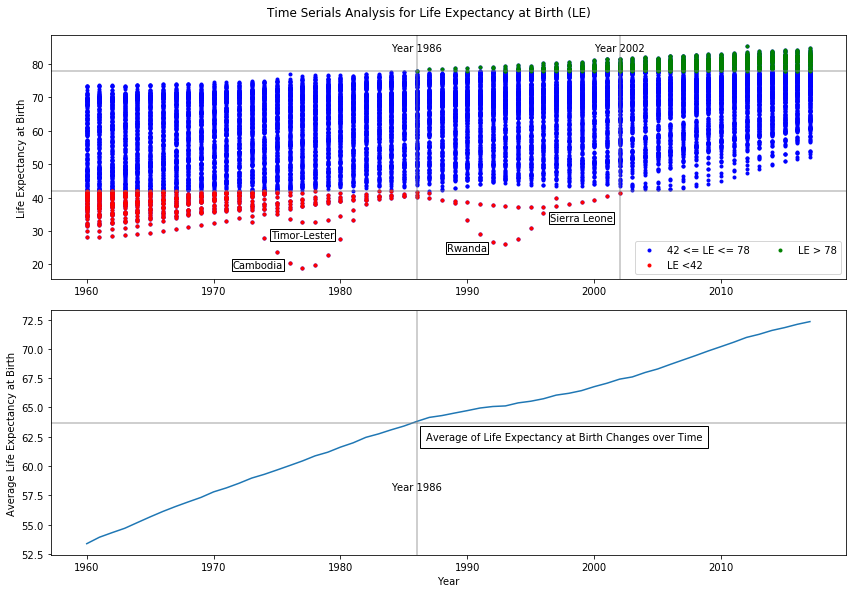

In [13]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12,8))

plt.subplot(2,1,1)
less_42 = df['life_expectancy_at_birth'] < 42
more_78 = df['life_expectancy_at_birth'] > 78
plt.plot(df['date'], df['life_expectancy_at_birth'], 'b.')
plt.plot(df['date'][less_42], df['life_expectancy_at_birth'][less_42], 'r.')
plt.plot(df['date'][more_78], df['life_expectancy_at_birth'][more_78], 'g.')
plt.axhline(78, c='0.5', alpha=0.5) 
plt.axhline(42, c='0.5', alpha=0.5) 
plt.axvline(2002,c='0.5', alpha=0.5)
plt.text(2000, 84, 'Year 2002')
plt.axvline(1986, c='0.5', alpha=0.5)
plt.text(1984, 84, 'Year 1986')
plt.xlabel('')
plt.ylabel('Life Expectancy at Birth')
plt.text(x=1973.5, y=19, s='Cambodia', horizontalalignment='center', 
        bbox={'linestyle': '-', 'facecolor': 'w', 'pad': 1})
plt.text(x=1977, y=28, s='Timor-Lester', horizontalalignment='center', 
        bbox={'linestyle': '-', 'facecolor': 'w', 'pad': 1})
plt.text(x=1990, y=24, s='Rwanda', horizontalalignment='center', 
        bbox={'linestyle': '-', 'facecolor': 'w', 'pad': 1})
plt.text(x=1999, y=33, s='Sierra Leone', horizontalalignment='center', 
        bbox={'linestyle': '-', 'facecolor': 'w', 'pad': 1})
plt.legend(('42 <= LE <= 78', 'LE <42', 'LE > 78'), loc='lower right', ncol=2, frameon=True, facecolor='white');

plt.subplot(2,1,2)
plt.plot(df2['life_expectancy_at_birth'].mean(level=1).sort_values(ascending=True))
plt.axhline(df2['life_expectancy_at_birth'].mean(), c='0.5', alpha=0.5) 
plt.axvline(1986, c='0.5', alpha=0.5) 
plt.text(1984, 58, 'Year 1986')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy at Birth')
plt.text(x=1997.6, y=62.2, s='Average of Life Expectancy at Birth Changes over Time', horizontalalignment='center', 
        bbox={'linestyle': '-', 'facecolor': 'w', 'pad': 6})

plt.suptitle('Time Serials Analysis for Life Expectancy at Birth (LE)', y=1.025)
fig.tight_layout()

### The chart above is generate to provide time serials analysis for Life Expectancy at Birth (LE), with first one using each LE in the main chart (df), and second one using year average LE. We could view that, 1) average of Life Expectancy at Birth keep increasing over time (1960 - 2017), and the growth rate after Year 1986 is slight small than that before 1986. 2) Most LE data falls between 42 and 78. High LE data (LE > 78) began to appear after 1986, and low LE data (LE < 42) disappear after 2002. 3）Although for most countries, LE increased over time, there are several special cases in which LE decreased over time. Cambodia's LE dropped dramatically from 43 in 1968 to 19 in 1977, and then increased back to 44 until 1983. Timor-Lester's LE dropped from 39 in 1972 to 33 in 1978, and then increased back to 40 until 1983. Rwanda's LE dropped dramatically from 52 in 1984 to 26 in 1993, and then increased back to 52 until 2003. Sierra Leone's LE dropped from 41 in 1983 to 37 in 1995, and then increased back to 41 until 2002. Further research could be done to look into what happens in those time periods, and discover why those happens (war, diseases, etc.).

### 4)  Appendix

In [14]:
Sierra_Leonea = df3[df3['country']=='Sierra Leone']
Mali = df3[df3['country']=='Mali']
South_Sudan = df3[df3['country']=='South Sudan']
Niger = df3[df3['country']=='Niger']
Nigeria = df3[df3['country']=='Nigeria']
Central_African_Republic = df3[df3['country']=='Central African Republic']
Chad = df3[df3['country']=='Chad']
Malawi = df3[df3['country']=='Malawi']
Angola = df3[df3['country']=='Angola']
Mozambique = df3[df3['country']=='Mozambique']    

box1 = go.Box(
                y= Sierra_Leonea.life_expectancy_at_birth,
                name= 'Sierra Leone',
                marker = dict(color = 'rgb(124, 205, 124)'),
                boxmean='sd',
                boxpoints='all')
box2 = go.Box(
                y= Mali.life_expectancy_at_birth,
                name= 'Mali',
                marker = dict(color = 'rgb(84, 139, 84)'),
                boxmean='sd',
                boxpoints='all')

box3 = go.Box(
                y= South_Sudan.life_expectancy_at_birth,
                name= 'South Sudan',
                marker = dict(color = 'rgb(144, 238, 144)'),
                boxmean='sd',
                boxpoints='all')
box4 = go.Box(
                y= Niger.life_expectancy_at_birth,
                name= 'Niger',
                marker = dict(color = 'rgb(0, 238, 118)'),
                boxmean='sd',
                boxpoints='all')
box5 = go.Box(
                y= Nigeria.life_expectancy_at_birth,
                name= 'Nigeria',
                marker = dict(color = 'rgb(0, 205, 102)'),
                boxmean='sd',
                boxpoints='all')

box6 = go.Box(
                y= Central_African_Republic.life_expectancy_at_birth,
                name= 'Central African Republic',
                marker = dict(color = 'rgb(0, 139, 69)'),
                boxmean='sd',
                boxpoints='all')
box7 = go.Box(
                y= Chad.life_expectancy_at_birth,
                name= 'Chad',
                marker = dict(color = 'rgb(0, 255, 0)'),
                boxmean='sd',
                boxpoints='all')

box8 = go.Box(
                y= Malawi.life_expectancy_at_birth,
                name= 'Malawi',
                marker = dict(color = 'rgb(0, 205, 0)'),
                boxmean='sd',
                boxpoints='all')
box9 = go.Box(
                y= Angola.life_expectancy_at_birth,
                name= 'Angola',
                marker = dict(color = 'rgb(0, 139, 0)'),
                boxmean='sd',
                boxpoints='all')
box10 = go.Box(
                y= Mozambique.life_expectancy_at_birth,
                name= 'Mozambique',
                marker = dict(color = 'rgb(102, 205, 0)'),
                boxmean='sd',
                boxpoints='all')

data_boxes = [box1,box2,box3,box4,box5,box6,box7,box8,box9,box10]
iplot(data_boxes)


San_Marino = df3[df3['country']=='San Marino']
Cayman_Islands = df3[df3['country']=='Cayman Islands']
Liechtenstein = df3[df3['country']=='Liechtenstein']
Faroe_Islands = df3[df3['country']=='Faroe Islands']
Bermuda = df3[df3['country']=='Bermuda']
Iceland = df3[df3['country']=='Iceland']
Japan = df3[df3['country']=='Japan']
Sweden = df3[df3['country']=='Sweden']
Switzerland = df3[df3['country']=='Switzerland']
Isle_of_Man = df3[df3['country']=='Isle of Man']

# 'Iceland', 'Japan', 'Sweden', 'Switzerland', 'Isle of Man'

box1 = go.Box(
                y= San_Marino.life_expectancy_at_birth,
                name= 'San Marino',
                marker = dict(color = 'rgb(0, 0, 128)'),
                boxmean='sd',
                boxpoints='all')
box2 = go.Box(
                y= Cayman_Islands.life_expectancy_at_birth,
                name= 'Cayman Islands',
                marker = dict(color = 'rgb(100, 149, 237)'),
                boxmean='sd',
                boxpoints='all')
box3 = go.Box(
                y= Liechtenstein.life_expectancy_at_birth,
                name= 'Liechtenstein',
                marker = dict(color = 'rgb(72, 61, 139)'),
                boxmean='sd',
                boxpoints='all')
box4 = go.Box(
                y= Faroe_Islands.life_expectancy_at_birth,
                name= 'Faroe Islands',
                marker = dict(color = 'rgb(123, 104, 238)'),
                boxmean='sd',
                boxpoints='all')
box5 = go.Box(
                y= Bermuda.life_expectancy_at_birth,
                name= 'Bermuda',
                marker = dict(color = 'rgb(65, 105, 225)'),
                boxmean='sd',
                boxpoints='all')

box6 = go.Box(
                y= Iceland.life_expectancy_at_birth,
                name= 'Iceland',
                marker = dict(color = 'rgb(0, 0, 255)'),
                boxmean='sd',
                boxpoints='all')
box7 = go.Box(
                y= Japan.life_expectancy_at_birth,
                name= 'Japan',
                marker = dict(color = 'rgb(30, 144, 255)'),
                boxmean='sd',
                boxpoints='all')
box8 = go.Box(
                y= Sweden.life_expectancy_at_birth,
                name= 'Sweden',
                marker = dict(color = 'rgb(0, 191, 255)'),
                boxmean='sd',
                boxpoints='all')
box9 = go.Box(
                y= Switzerland.life_expectancy_at_birth,
                name= 'Switzerland',
                marker = dict(color = 'rgb(135, 206, 250)'),
                boxmean='sd',
                boxpoints='all')
box10 = go.Box(
                y= Isle_of_Man.life_expectancy_at_birth,
                name= 'Isle of Man',
                marker = dict(color = 'rgb(70, 130, 1805)'),
                boxmean='sd',
                boxpoints='all')

data_boxes = [box1,box2,box3,box4,box5,box6,box7,box8,box9,box10]
iplot(data_boxes)

### The chart above is generate based on df3, using top 10 and tail 10 countries' Life Expectancy at Birth (LE) data, with the first one using tail 10s' LE and second one using top 10s' LE. We could view that, 1) All tail 10 countries' LE is between 28 and 64, and all top 10 countries' LE is between 68 and 85. And the change interval for top 10 countries' LE is much smaller than that for the tail 10 countries' LE. 2) For most tail 10 countries' LE, it increased slowly in first several years, while the increase rate turns larger after certain time points. And for most top 10 countries' LE, it increased quickly in first several years, while the increase rate turns smaller after certain time points. 3) There are three countries from the top 10 have very limit data points, and further supporting data should be collected to clarify the life expectancy of birth status for those countries.